### load DataSEt

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Insta_Influencer_Data_set.csv")
#print(df.head(10))
#non_row = df[df.isnull().any(axis=1)]
#print(non_row)


###  Drop rows with NaNs for clean analysis


In [4]:
df_clean = df.dropna()

print(f"Data shape after dropping NaNs: {df_clean.shape}")
# here 500 records,  76 row lo atleast one NaN value are removed...

Data shape after dropping NaNs: (424, 9)


### Summary
#### clean data


In [12]:
print(df_clean.describe())
#print(df.head(10))

           Followers     Avg_Likes  Avg_Comments  Engagement_Rate  \
count     424.000000    424.000000    424.000000       424.000000   
mean   512091.636792  24340.599057   2447.660377         0.163022   
std    289817.542150  14570.221386   1469.007755         0.506932   
min      5404.000000    109.000000     11.000000         0.001166   
25%    256337.750000  11297.750000   1041.750000         0.026549   
50%    530210.500000  23355.500000   2411.000000         0.052345   
75%    755604.250000  37458.000000   3748.750000         0.107702   
max    998176.000000  49788.000000   4979.000000         5.442724   

       Authenticity_Score  Influencer_Score  Promotions_Rate  
count          424.000000        424.000000       424.000000  
mean             0.743939          0.395385         0.167474  
std              0.137694          0.308090         0.072912  
min              0.500000          0.206900         0.058600  
25%              0.620000          0.295400         0.118750  


### Distribution of Followers ( HISTOGRAM )


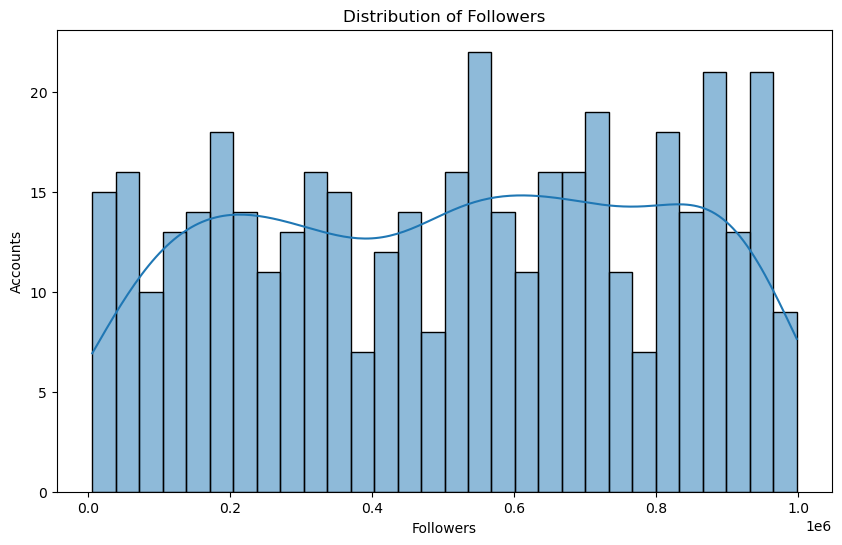

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean['Followers'], bins=30, kde=True)
plt.title('Distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Accounts')
plt.show()





### Boxplot of Influencer Score by categories ( BOXPLOT)

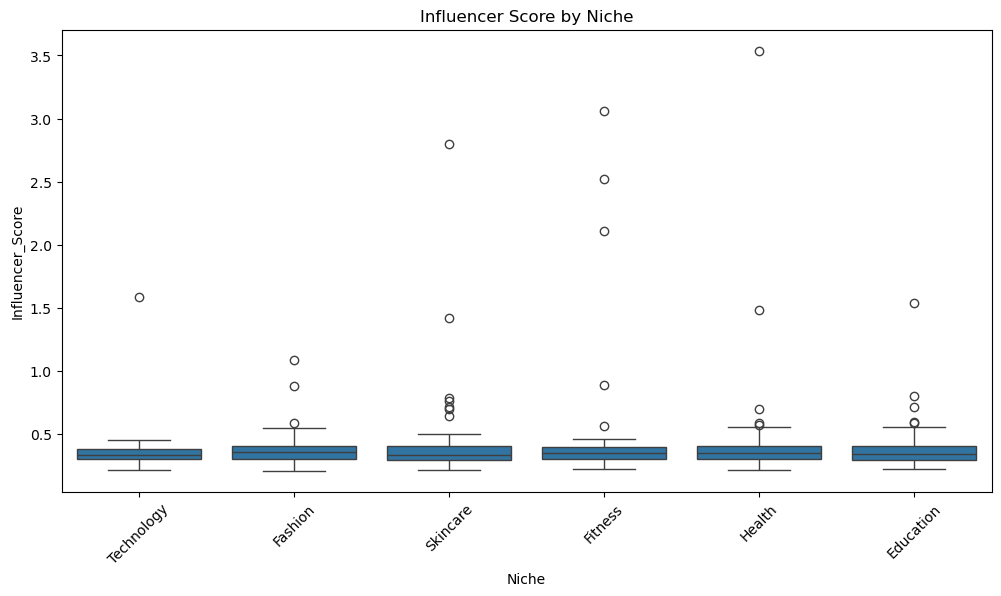

In [15]:

plt.figure(figsize=(12,6))
sns.boxplot(x='Niche', y='Influencer_Score', data=df_clean)
plt.title('Influencer Score by Niche')
plt.xticks(rotation=45)
plt.show()



### Engagement Rate vs Followers with Influencer Score as size (Scatter plot)

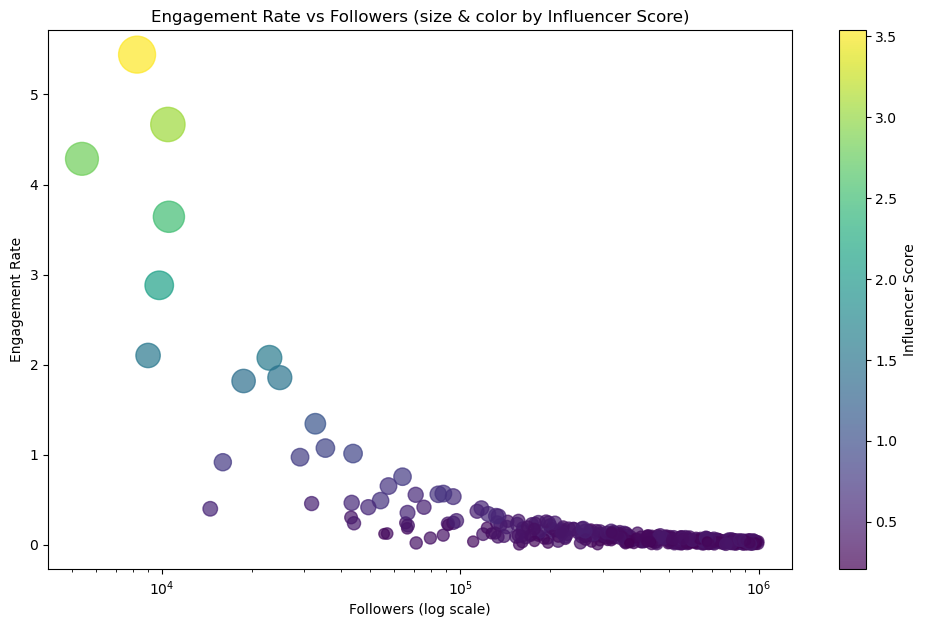

In [16]:
plt.figure(figsize=(12,7))
scatter = plt.scatter(
    df_clean['Followers'], 
    df_clean['Engagement_Rate'], 
    s=df_clean['Influencer_Score'] * 200,  
    # size proportional to Influencer Score
    c=df_clean['Influencer_Score'],        
    # color by Influencer Score
    cmap='viridis',
    alpha=0.7
)
plt.xscale('log')
plt.colorbar(scatter, label='Influencer Score')
plt.title('Engagement Rate vs Followers (size & color by Influencer Score)')
plt.xlabel('Followers (log scale)')
plt.ylabel('Engagement Rate')
plt.show()


### Correlation heatmap (including Influencer Score)

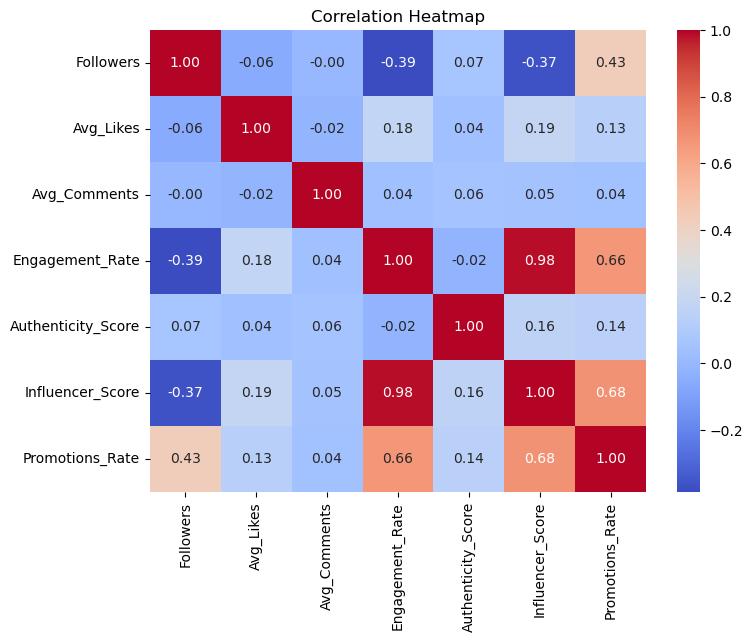

In [17]:

plt.figure(figsize=(8,6))
corr = df_clean.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### top 5 influencers based on Influencer_Score and Promotions_Rate

In [25]:

top_n_per_niche = 5  

top_influencers = (
    df_clean
    .sort_values(['Niche', 'Influencer_Score', 'Promotions_Rate'], ascending=[True, False, False])
    .groupby('Niche')
    .head(top_n_per_niche)
    .reset_index(drop=True)
)

top_influencers['Raw_Earning_Score'] = (top_influencers['Followers'] *  top_influencers['Engagement_Rate'] *top_influencers['Influencer_Score'] *top_influencers['Promotions_Rate']
)

max_raw = top_influencers['Raw_Earning_Score'].max()
scale_target = 100000
scaling_factor = scale_target / max_raw


top_influencers['Expected_Money'] = (top_influencers['Raw_Earning_Score'] * scaling_factor).round(2)


top_influencers_final = top_influencers.drop(
    columns=['Avg_Likes', 'Avg_Comments', 'Authenticity_Score', 'Raw_Earning_Score']
)

top_influencers_final.to_csv("Top_Influencers.csv", index=False)